<a href="https://colab.research.google.com/github/AzizBenAmara19/Pneumonia/blob/main/test_med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: install keras.preprocessing.image

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# prompt: import kagglehub

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The line below is unnecessary as it's already in the original code.
#!pip install tensorflow


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os
import kagglehub

In [ ]:
dataset_path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Dataset téléchargé à :", dataset_path)

Dataset téléchargé à : /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
import os
print("Chemin réel du dataset :", dataset_path)
print("Contenu du répertoire :", os.listdir(dataset_path))


Chemin réel du dataset : /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
Contenu du répertoire : ['chest_xray']


In [ ]:
# Installer Kaggle
!pip install kaggle

# Copier kaggle.json dans le bon dossier
!mkdir -p ~/.kaggle
!cp /chemin/vers/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Sécuriser l'accès

# Télécharger le dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Extraire le fichier zip
!unzip chest-xray-pneumonia.zip -d chest_xray

cp: cannot stat '/chemin/vers/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chest-xray-pneumonia.zip
replace chest_xray/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chest_xray/chest_xray/__MACOSX/._chest_xray  
replace chest_xray/chest_xray/__MACOSX/chest_xray/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chest_xray/chest_xray/__MACOSX/chest_xray/._.DS_Store  
replace chest_xray/chest_xray/__MACOSX/chest_xray/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chest_xray/chest_xray/__MACOSX/chest_xray/._test  
replace chest_xray/chest_xray/__MACOSX/chest_xray/._train? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chest_xray/

In [ ]:
import numpy as np
from tqdm import tqdm

IMG_SIZE = 150  # Taille des images

def get_training_data(directory):
    X = []  # Images
    y = []  # Labels

    # Parcourir les dossiers NORMAL et PNEUMONIA
    for label in ["NORMAL", "PNEUMONIA"]:
        path = os.path.join(directory, label)
        class_num = 0 if label == "NORMAL" else 1  # 0 = normal, 1 = pneumonie

        for img in tqdm(os.listdir(path)):  # Chargement des images
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Redimensionnement
                X.append(img_array)
                y.append(class_num)
            except Exception as e:
                pass  # Ignorer les erreurs

    X = np.array(X) / 255.0  # Normalisation
    y = np.array(y)

    return X, y


In [ ]:
train_X, train_y = get_training_data('/content/chest_xray/chest_xray/train')
test_X, test_y = get_training_data('/content/chest_xray/chest_xray/test')
val_X, val_y = get_training_data('/content/chest_xray/chest_xray/val')

print("Train data shape:", train_X.shape)
print("Test data shape:", test_X.shape)
print("Validation data shape:", val_X.shape)


100%|██████████| 8/8 [00:00<00:00, 309.78it/s]

Train data shape: (5216, 150, 150, 3)
Test data shape: (624, 150, 150, 3)
Validation data shape: (16, 150, 150, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow_from_directory('/content/chest_xray/chest_xray/train',
                                    target_size=(150, 150), batch_size=32, class_mode='binary')

test = datagen.flow_from_directory('/content/chest_xray/chest_xray/test',
                                   target_size=(150, 150), batch_size=32, class_mode='binary')

val = datagen.flow_from_directory('/content/chest_xray/chest_xray/val',
                                  target_size=(150, 150), batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**Data Visualization & Preprocessing**

<Axes: ylabel='count'>

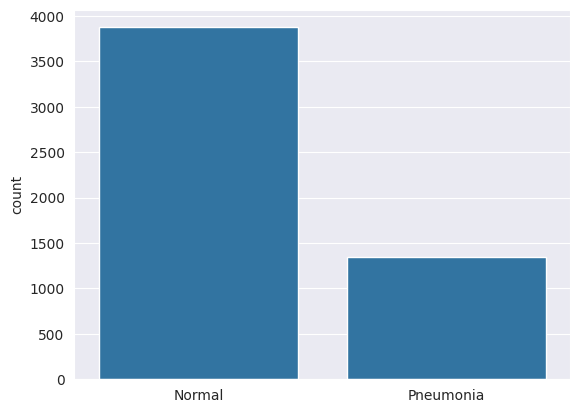

In [ ]:
l = []

# Parcourir tous les batches du générateur
for images, labels in train:
    for label in labels:
        if label == 0:
            l.append("Pneumonia")
        else:
            l.append("Normal")

    # Arrêter après un cycle complet
    if len(l) >= train.samples:
        break

# Affichage avec Seaborn
sns.set_style('darkgrid')
sns.countplot(x=l)

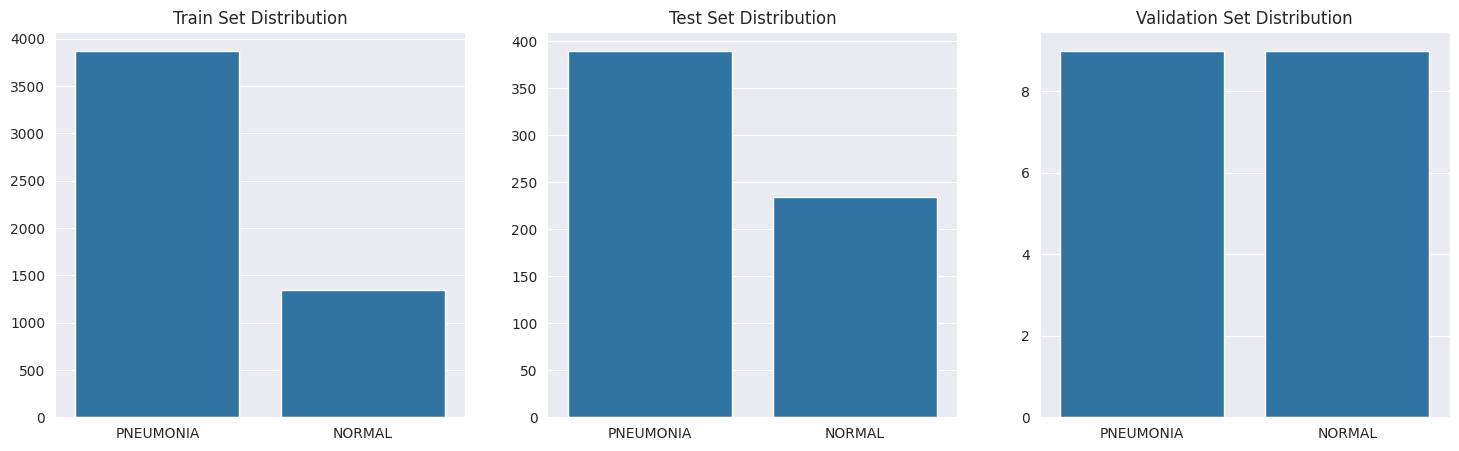

In [ ]:
# Définir les chemins des dossiers
train_dir = "/content/chest_xray/chest_xray/chest_xray/train/"
test_dir = "/content/chest_xray/chest_xray/chest_xray/test/"
val_dir = "/content/chest_xray/chest_xray/chest_xray/val/"

# Compter le nombre d'images par classe
categories = ["PNEUMONIA", "NORMAL"]
train_counts = [len(os.listdir(os.path.join(train_dir, cat))) for cat in categories]
test_counts = [len(os.listdir(os.path.join(test_dir, cat))) for cat in categories]
val_counts = [len(os.listdir(os.path.join(val_dir, cat))) for cat in categories]

# Création du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=categories, y=train_counts, ax=ax[0]).set(title="Train Set Distribution")
sns.barplot(x=categories, y=test_counts, ax=ax[1]).set(title="Test Set Distribution")
sns.barplot(x=categories, y=val_counts, ax=ax[2]).set(title="Validation Set Distribution")
plt.show()

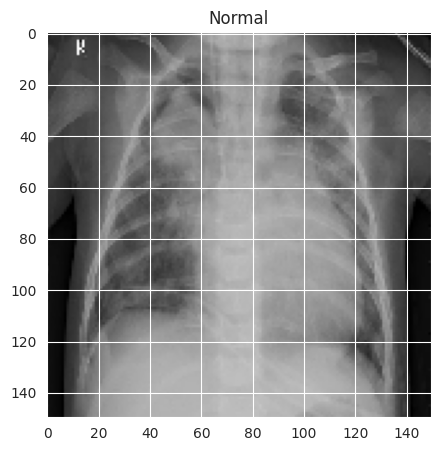

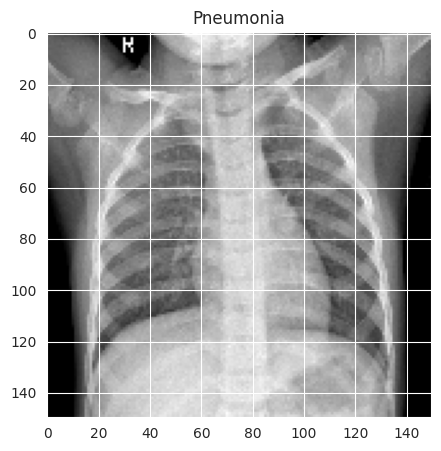

In [ ]:
import matplotlib.pyplot as plt

# Extraire un batch du générateur
images, image_labels = next(train)  # Prend le premier batch

# Définir les labels textuels
label_map = {0: "Pneumonia", 1: "Normal"}

# Afficher la première image du batch
plt.figure(figsize=(5,5))
plt.imshow(images[0], cmap='gray')  # Première image
plt.title(label_map[int(image_labels[0])])  # Son label
plt.show()

# Afficher la dernière image du batch
plt.figure(figsize=(5,5))
plt.imshow(images[-1], cmap='gray')  # Dernière image du batch
plt.title(label_map[int(image_labels[-1])])  # Son label
plt.show()


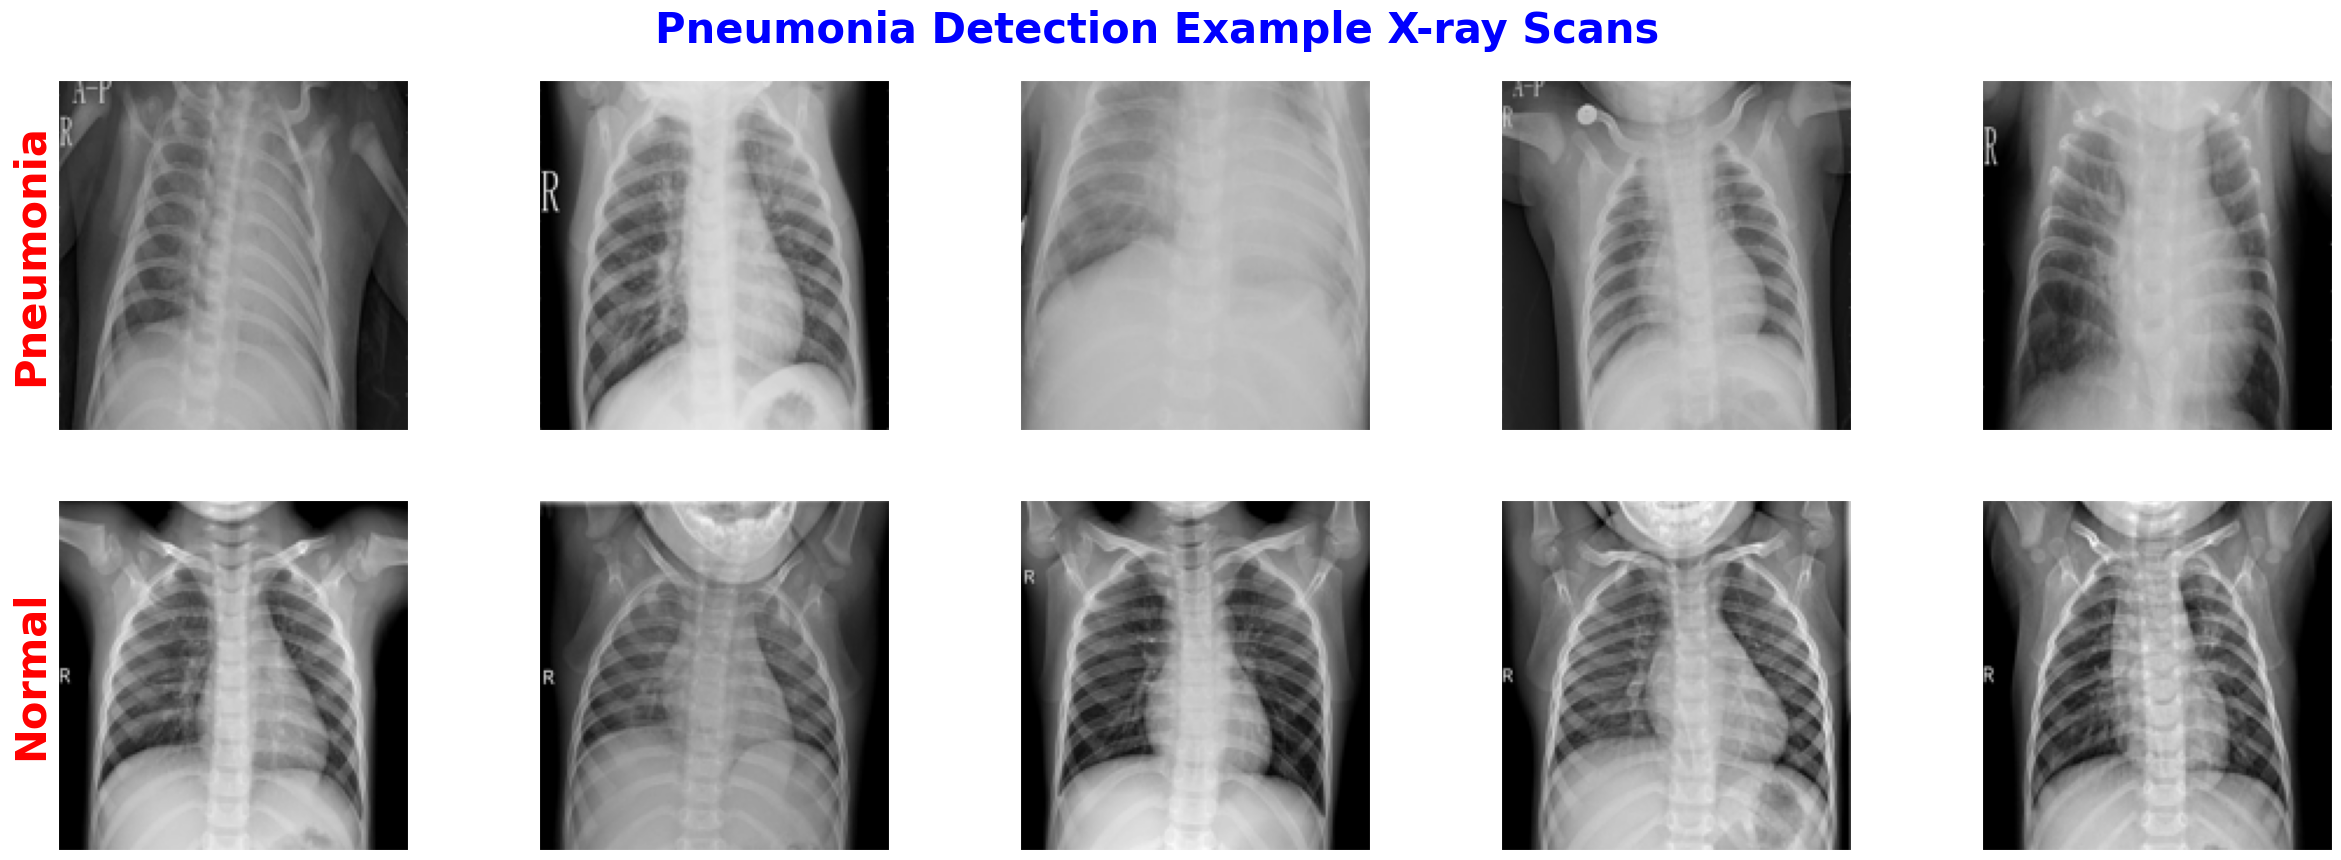

In [ ]:
from PIL import Image

# Définition des chemins des dossiers d'images
train_pn = "/content/chest_xray/chest_xray/chest_xray/train/PNEUMONIA/"
train_n = "/content/chest_xray/chest_xray/chest_xray/train/NORMAL/"

# Lister les images disponibles
img2 = os.listdir(train_pn)[:5]  # Prendre 5 images de Pneumonia
img = os.listdir(train_n)[:5]  # Prendre 5 images normales

# Création du graphe avec 2 lignes et 5 colonnes
fig, axes = plt.subplots(2, 5, figsize=(30, 10))

for i in range(5):
    # Charger une image Pneumonia
    image = Image.open(os.path.join(train_pn, img2[i]))
    image = image.convert('RGB')
    image = image.resize((150, 150))
    image_array = np.array(image)
    axes[0, i].imshow(image_array)
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])

    # Charger une image Normale
    image = Image.open(os.path.join(train_n, img[i]))
    image = image.convert('RGB')
    image = image.resize((150, 150))
    image_array = np.array(image)
    axes[1, i].imshow(image_array)
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])

# Ajouter les labels aux axes
axes[0, 0].set_ylabel("Pneumonia", fontsize=30, color="red", fontweight="bold")
axes[1, 0].set_ylabel("Normal", fontsize=30, color="red", fontweight="bold")

# Ajouter un titre global
fig.suptitle("Pneumonia Detection Example X-ray Scans", fontsize=30, y=0.95, color="blue", fontweight="bold")

# Afficher la figure
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical

categories = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 224

def load_data(data_dir):
    data = []
    labels = []
    valid_extensions = (".jpg", ".jpeg", ".png")

    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)  # 0 لـ NORMAL و 1 لـ PNEUMONIA

        if not os.path.exists(path):
            print(f"Warning: Directory {path} does not exist.")
            continue

        for img in os.listdir(path):
            img_path = os.path.join(path, img)


            if not img.lower().endswith(valid_extensions):
                print(f"Skipping non-image file: {img_path}")
                continue

            try:
                img_array = cv2.imread(img_path)
                if img_array is None:
                    print(f"Warning: Unable to load image {img_path}")
                    continue

                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                img_array = img_array.astype(np.float32) / 255.0  # تطبيع البيانات

                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(data), np.array(labels)

train_dir = "/content/chest_xray/chest_xray/chest_xray/train"
test_dir = "/content/chest_xray/chest_xray/chest_xray/test"
val_dir = "/content/chest_xray/chest_xray/chest_xray/val"

x_train, y_train = load_data(train_dir)
x_test, y_test = load_data(test_dir)
x_val, y_val = load_data(val_dir)

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")

Skipping non-image file: /content/chest_xray/chest_xray/chest_xray/train/NORMAL/.DS_Store
Skipping non-image file: /content/chest_xray/chest_xray/chest_xray/train/PNEUMONIA/.DS_Store
Skipping non-image file: /content/chest_xray/chest_xray/chest_xray/val/NORMAL/.DS_Store
Skipping non-image file: /content/chest_xray/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
x_train shape: (5216, 224, 224, 3), y_train shape: (5216, 2)
x_test shape: (624, 224, 224, 3), y_test shape: (624, 2)
x_val shape: (16, 224, 224, 3), y_val shape: (16, 2)


**Data** **Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

datagen.fit(x_train)  # Apply augmentation on training data

In [ ]:
IMG_SIZE = 150
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% des données seront pour la validation
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training"
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


**Training the Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Définition du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Évite le surapprentissage
    layers.Dense(1, activation='sigmoid')  # Sigmoid pour classification binaire
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7398 - loss: 0.5675 - val_accuracy: 0.8082 - val_loss: 0.4326
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8235 - loss: 0.3703 - val_accuracy: 0.8495 - val_loss: 0.3215
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8718 - loss: 0.2943 - val_accuracy: 0.8610 - val_loss: 0.3072
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8672 - loss: 0.2979 - val_accuracy: 0.8936 - val_loss: 0.2540
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8867 - loss: 0.2688 - val_accuracy: 0.8370 - val_loss: 0.3592
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.8993 - loss: 0.2521 - val_accuracy: 0.8869 - val_loss: 0.2773
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8928 - loss: 0.2535 - val_accuracy: 0.8562 - val_loss: 0.3050
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8961 - loss: 0.2485 - val_accu

In [ ]:
import os
print(os.listdir('/content/chest_xray'))

['chest_xray']


In [ ]:
print(os.listdir('/content/chest_xray/chest_xray/chest_xray/test/'))

['PNEUMONIA', 'NORMAL', '.DS_Store']


In [ ]:
test_dir = '/content/chest_xray/chest_xray/test'

In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Pour classification binaire (Normal vs Pneumonia)
    shuffle=False  # Ne pas mélanger les données pour garder l'ordre de test
)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 386ms/step - accuracy: 0.6357 - loss: 0.9488
Test Accuracy: 79.81%


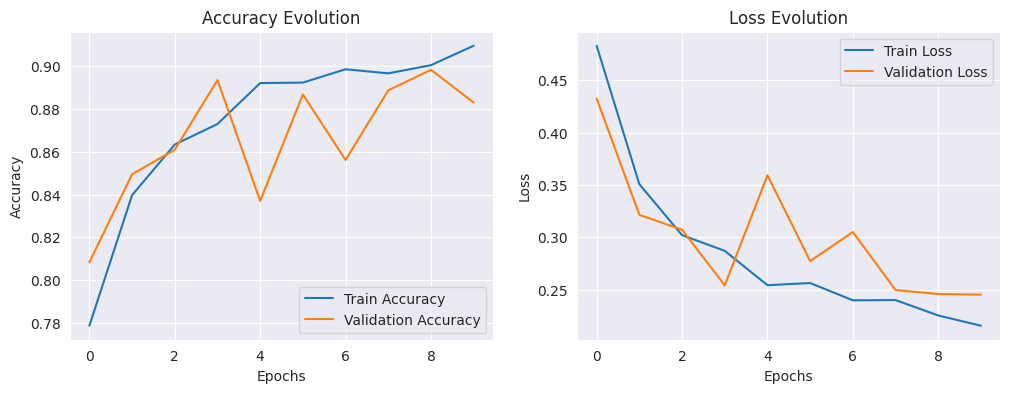

In [ ]:
plt.figure(figsize=(12, 4))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

plt.show()


In [ ]:
print(f"🎯 Test Accuracy: {test_acc * 100:.2f}%")

🎯 Test Accuracy: 79.81%


In [ ]:
# Prédictions sur le test set
y_pred = (model.predict(test_generator) > 0.5).astype("int32")
y_true = test_generator.classes

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 404ms/step


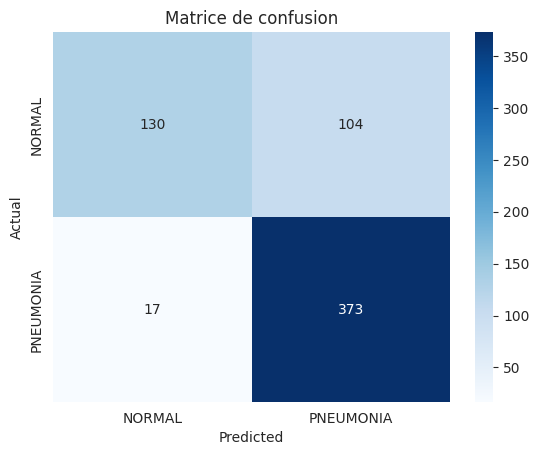

In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
# Rapport de classification
print(classification_report(y_true, y_pred, target_names=categories))

              precision    recall  f1-score   support

      NORMAL       0.88      0.56      0.68       234
   PNEUMONIA       0.78      0.96      0.86       390

    accuracy                           0.81       624
   macro avg       0.83      0.76      0.77       624
weighted avg       0.82      0.81      0.79       624

